In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
[f.fname for f in fm.fontManager.ttflist]
#[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
#font_list

['/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareEB.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoEcoBold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoBold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundL.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/t

In [3]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [5]:
# 데이터를 df 변수에 담고, df.shape로 행, 열을 볼 수 있습니다.
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape 

(91335, 39)

In [6]:
df.head() # shift+tab 키를 사용하면 라이브러리의 공식 문서에 있는 설명을 볼 수 있습니다.

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [10]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

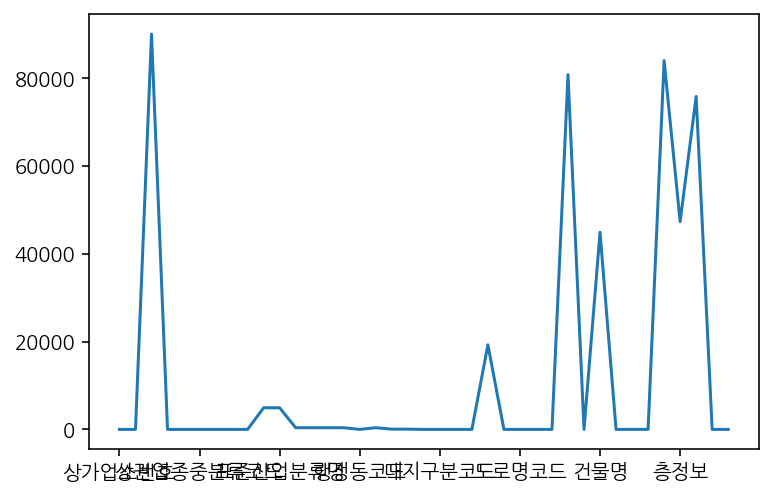

In [11]:
null_count.plot()

<AxesSubplot:>

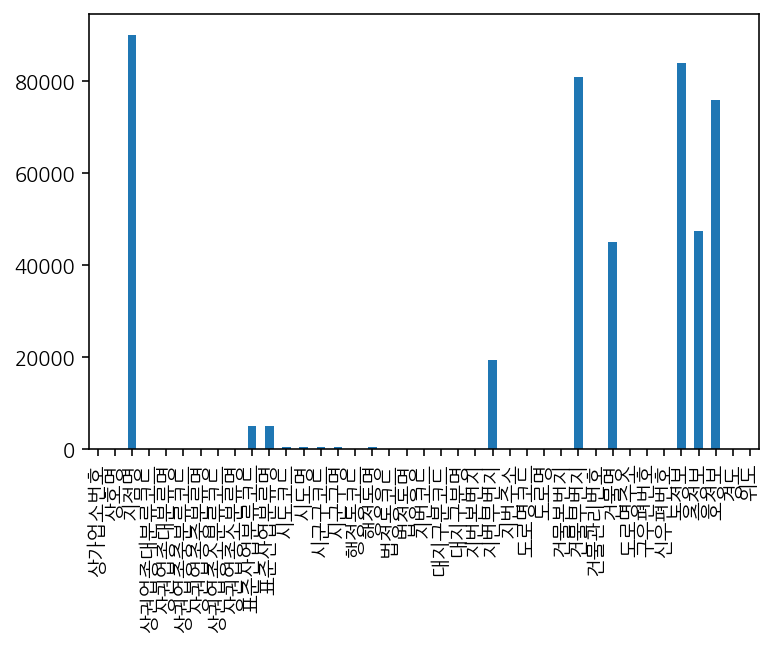

In [12]:
null_count.plot.bar()

<AxesSubplot:>

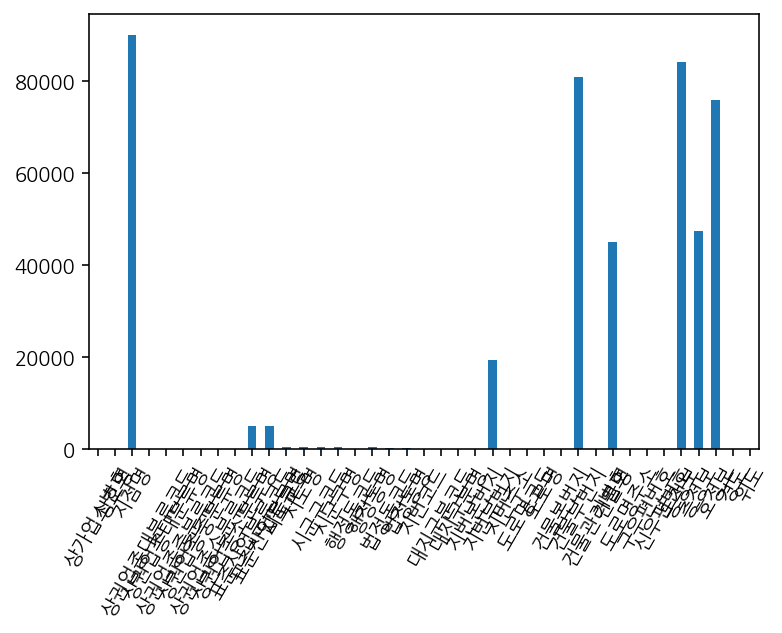

In [13]:
null_count.plot.bar(rot=60)

<AxesSubplot:>

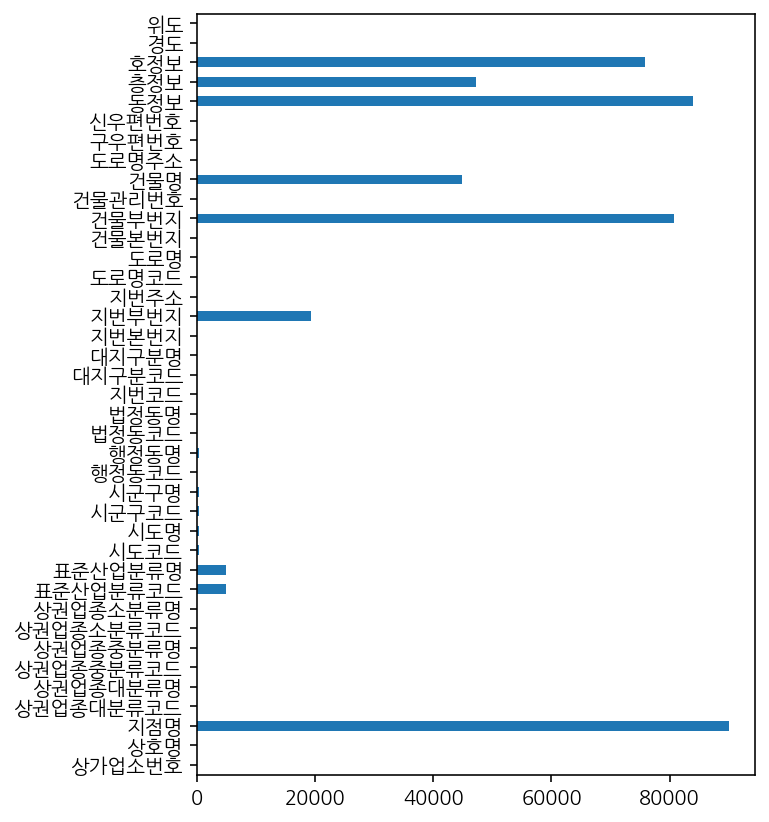

In [14]:
null_count.plot.barh(figsize=(5,7))

In [15]:
# 인덱스 초기화하기
# reset_index를 활용하면 데이터 프레임 형태로 변환이 됩니다.
df_null_count = null_count.reset_index()
df_null_count.head()
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [16]:
df_null_count.sort_values(by="결측치수", ascending=False)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [17]:
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [18]:
drop_columns = df_null_count_top["컬럼명"].tolist()
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [19]:
# 열을 기준으로 삭제해야 하기 때문에 axis = 1을 지정합니다. 행을 삭제하려면 0을 넣어야 합니다.
df = df.drop(drop_columns, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

In [21]:
# 위도 데이터의 기초 통계값을 알아보겠습니다.
df["위도"].dtypes 

dtype('float64')

In [22]:
# 평균값
df["위도"].mean()

36.62471119236686

In [23]:
# 중앙값
df["위도"].median()

37.23465231770329

In [24]:
# 최대값
df["위도"].max()

38.499658570559795

In [25]:
# 최소값
df["위도"].min()

33.2192896688307

In [26]:
# 개수
df["위도"].count()

91335

In [27]:
# 요약값 확인하기
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [28]:
# 2개 이상의 column 요약하기
df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [29]:
# 숫자로 된 데이터만 요약 : number
df.describe(include="number")

,상가업소번호,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,3.293207e+11,251.200482,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,1.297391e+11,477.456487,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.111020e+11,0.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.635042e+11,29.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,4.111743e+11,92.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,4.311332e+11,257.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,5.013049e+11,8795.000000,799801.000000,63643.00000,130.909912,38.499659


In [30]:
#  문자열 데이터만 요약 : object
df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [31]:
# 모든 데이터 요약 : all
df.describe(include="all")

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
count,9.133500e+04,91335,91335,91335,91335,91335,91335,91335,90956,90956.000000,...,91335,9.133500e+04,91335,91335.000000,91335,91335,91323.000000,91333.00000,91335.000000,91335.000000
unique,NaN,56910,1,1,5,5,34,34,17,NaN,...,53118,NaN,16610,NaN,54142,54031,NaN,NaN,NaN,NaN
top,NaN,리원,S,의료,S01,병원,S02A01,약국,경기도,NaN,...,서울특별시 동대문구 제기동 965-1,NaN,서울특별시 강남구 강남대로,NaN,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10,NaN,NaN,NaN,NaN
freq,NaN,152,91335,91335,60774,60774,18964,18964,21374,NaN,...,198,NaN,326,NaN,198,198,NaN,NaN,NaN,NaN
mean,2.121818e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32898.381877,...,NaN,3.293207e+11,NaN,251.200482,NaN,NaN,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12985.393171,...,NaN,1.297391e+11,NaN,477.456487,NaN,NaN,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11110.000000,...,NaN,1.111020e+11,NaN,0.000000,NaN,NaN,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26350.000000,...,NaN,2.635042e+11,NaN,29.000000,NaN,NaN,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41117.000000,...,NaN,4.111743e+11,NaN,92.000000,NaN,NaN,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43113.000000,...,NaN,4.311332e+11,NaN,257.000000,NaN,NaN,602811.000000,46044.00000,128.108919,37.507463


In [32]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [33]:
df["상권업종대분류명"].nunique()

1

In [34]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [35]:
df["상권업종중분류명"].nunique()

5

In [36]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [37]:
df["상권업종소분류명"].nunique()

34

In [38]:
len(df["상권업종소분류명"].unique())

34

In [39]:
# value_counts로는 각 value가 몇 개인지를 세어줍니다.
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [40]:
# normalize 옵션을 넣으면 전체에서 차지하는 비율을 계산해줍니다.
df["시도명"].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

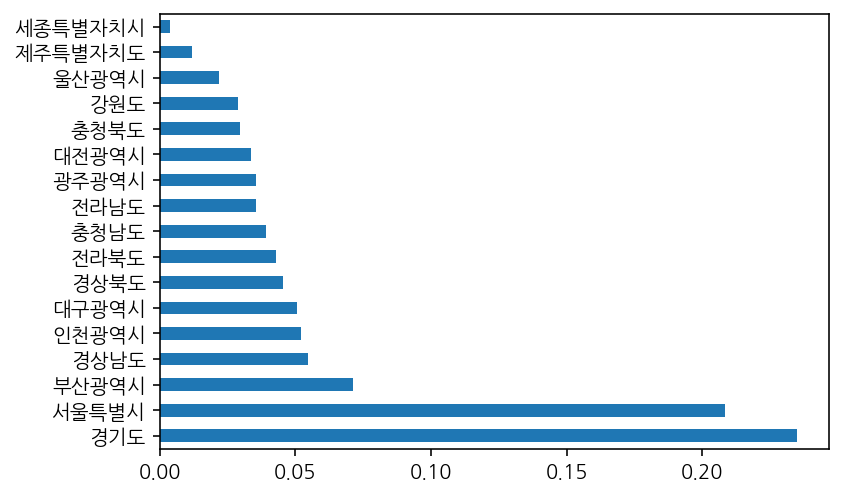

In [41]:
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize.plot.barh()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='시도명'>

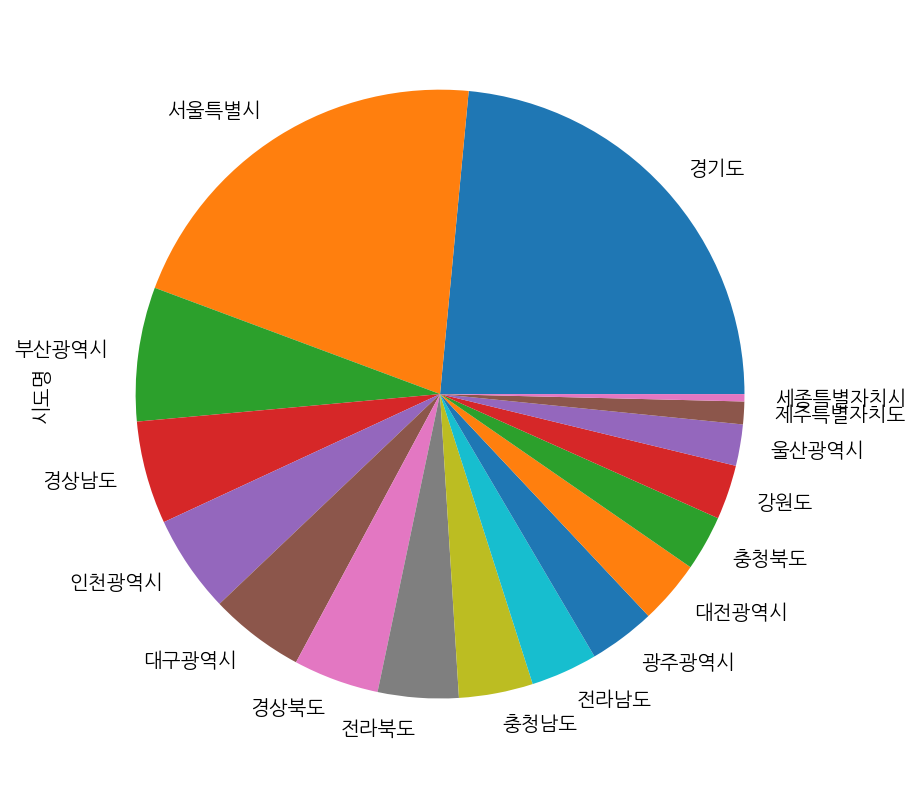

In [42]:
city_normalize.plot.pie(figsize=(7, 7))
# 서울시, 경기도의 차이를 확인하기 어렵고 다른 지역들도 마찬가지이므로 막대그래프가 더 보기 편하겠죠?
# seaborn에서는 pie chart의 모호함 때문에 앞으로도 pie chart를 만들 계획이 없다고 합니다.

<AxesSubplot:xlabel='count', ylabel='시도명'>

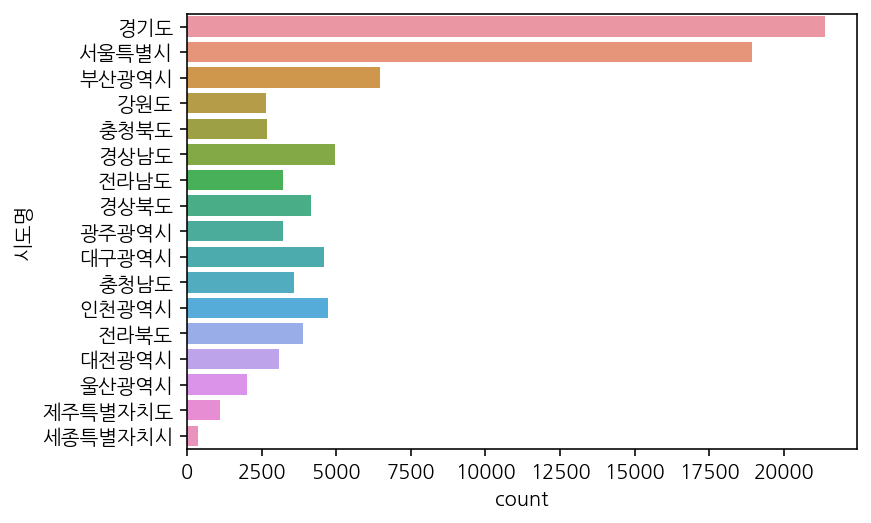

In [43]:
# seaborn으로 그래프 그려보기
# seaborn은 대체로 x, y, data를 기본으로 넣어줘야 하지만 countplot은 x,y 중 하나만 넣어도 됩니다.
# seaborn의 장점 : 고급 통계 기능을 그래프 내부에서 제공합니다.
# seaborn의 단점 : 데이터 크기가 클수록 속도가 느립니다.
    
sns.countplot(data=df, y="시도명")

In [44]:
# 상권업종대분류명의 데이터 값 당 개수를 세어봅니다.
df["상권업종대분류명"].value_counts() 

의료    91335
Name: 상권업종대분류명, dtype: int64

In [45]:
c = df["상권업종중분류명"].value_counts()

In [46]:
# normalize는 전체 대비 비율을 보여줍니다. 이 데이터를 n이라는 변수로 지정합니다
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

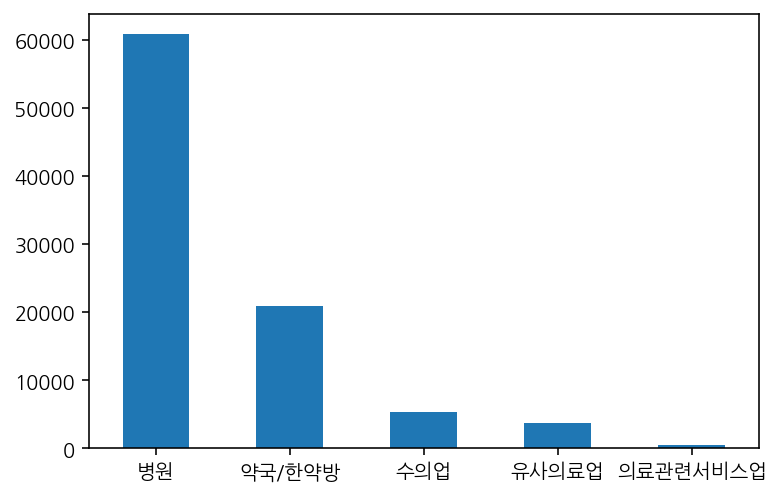

In [47]:
# bar 플롯을 그려봅니다. rot을 1로 두어서 그래프의 글자를 수평으로 만듭니다.
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

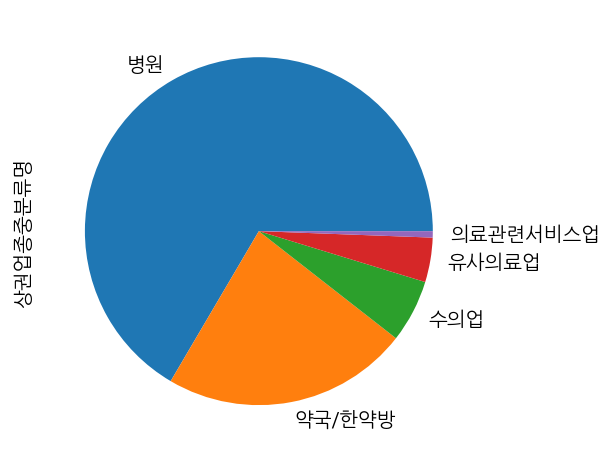

In [48]:
# 파이 그래프를 그립니다.
n.plot.pie()

<AxesSubplot:>

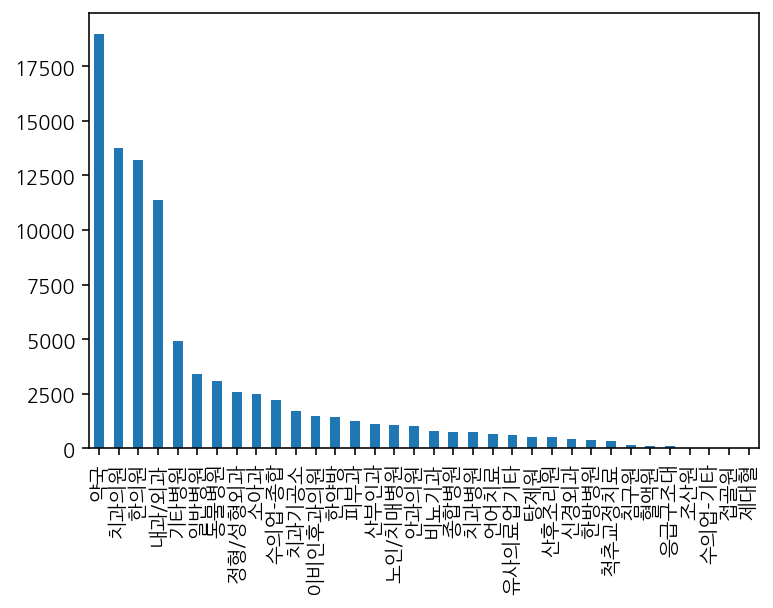

In [49]:
# bar 그래프로 그리며 더욱 보기 쉽습니다.
c = df["상권업종소분류명"].value_counts()
c.plot.bar()

<AxesSubplot:>

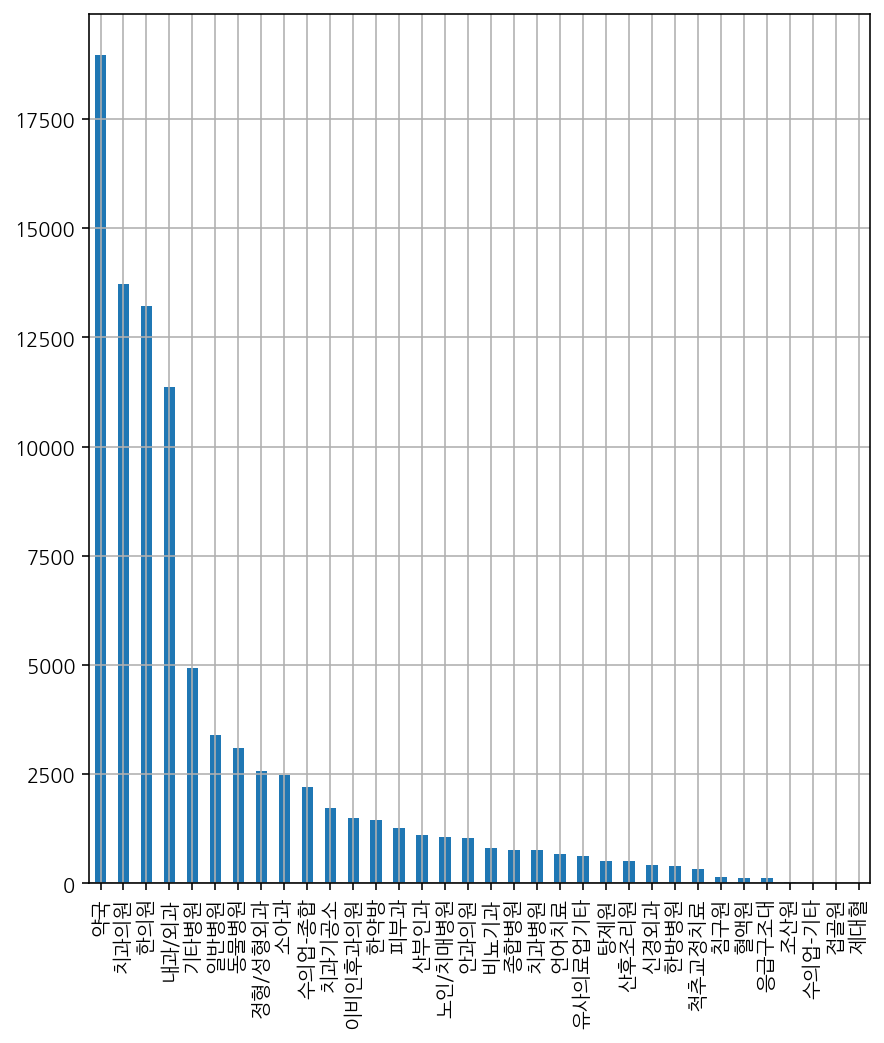

In [50]:
# 사이즈를 조절하고, 그리드를 넣습니다.
c.plot.bar(figsize=(7,8), grid=True)

In [51]:
df["상권업종중분류명"] == "약국/한약방"

0        False
1        False
2        False
3        False
4         True
         ...  
91330     True
91331    False
91332    False
91333    False
91334    False
Name: 상권업종중분류명, Length: 91335, dtype: bool

In [52]:
# 다른 목적으로 사용한다면 copy()를 해야 warning이 뜨지 않거나 원본에 영향을 미치지 않습니다. 
# 그리고 이 데이터를 df_medical이라는 변수에 넣습니다.
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()

In [53]:
# 이제 2개의 조건을 사용해봅니다.
# 상권업종대분류명이 의료인 데이터의 상권업종중분류명을 가져오고 싶을 때 loc를 함께 사용합니다.
df.loc[df["상권업종대분류명"] == "의료"]["상권업종중분류명"]
# 조건에 맞는 데이터 개수 세기
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [54]:
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [55]:
df[df["상권업종중분류명"] ==  "유사의료업"].shape

(3774, 29)

In [56]:
df["상호명"].value_counts().tail()

토종약초탕제원     1
최대경산부인과     1
경기의료소비자     1
메디칼빈센트약국    1
우정치과        1
Name: 상호명, dtype: int64

In [57]:
df_medical["상호명"].value_counts().head(10)

온누리약국    149
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
하나약국      72
서울약국      71
Name: 상호명, dtype: int64

In [58]:
# 연산자 우선순위에 의해 각 조건에 ()를 걸어줍니다. and는 &, or은 |를 사용하여 조건을 정해줍니다.
(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")
df_seoul_drug = (df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")
print(df_seoul_drug.shape)
df_seoul_drug

(91335,)


0        False
1        False
2        False
3        False
4        False
         ...  
91330    False
91331    False
91332    False
91333    False
91334    False
Length: 91335, dtype: bool

In [59]:
df["시군구명"]


0        안산시 단원구
1            강남구
2            시흥시
3            수영구
4        용인시 수지구
          ...   
91330         서구
91331    고양시 덕양구
91332        금정구
91333        강동구
91334    천안시 동남구
Name: 시군구명, Length: 91335, dtype: object

In [60]:
c = df["시군구명"].value_counts()
c.head()

서구     3165
강남구    3120
남구     2994
중구     2724
북구     2359
Name: 시군구명, dtype: int64

<AxesSubplot:>

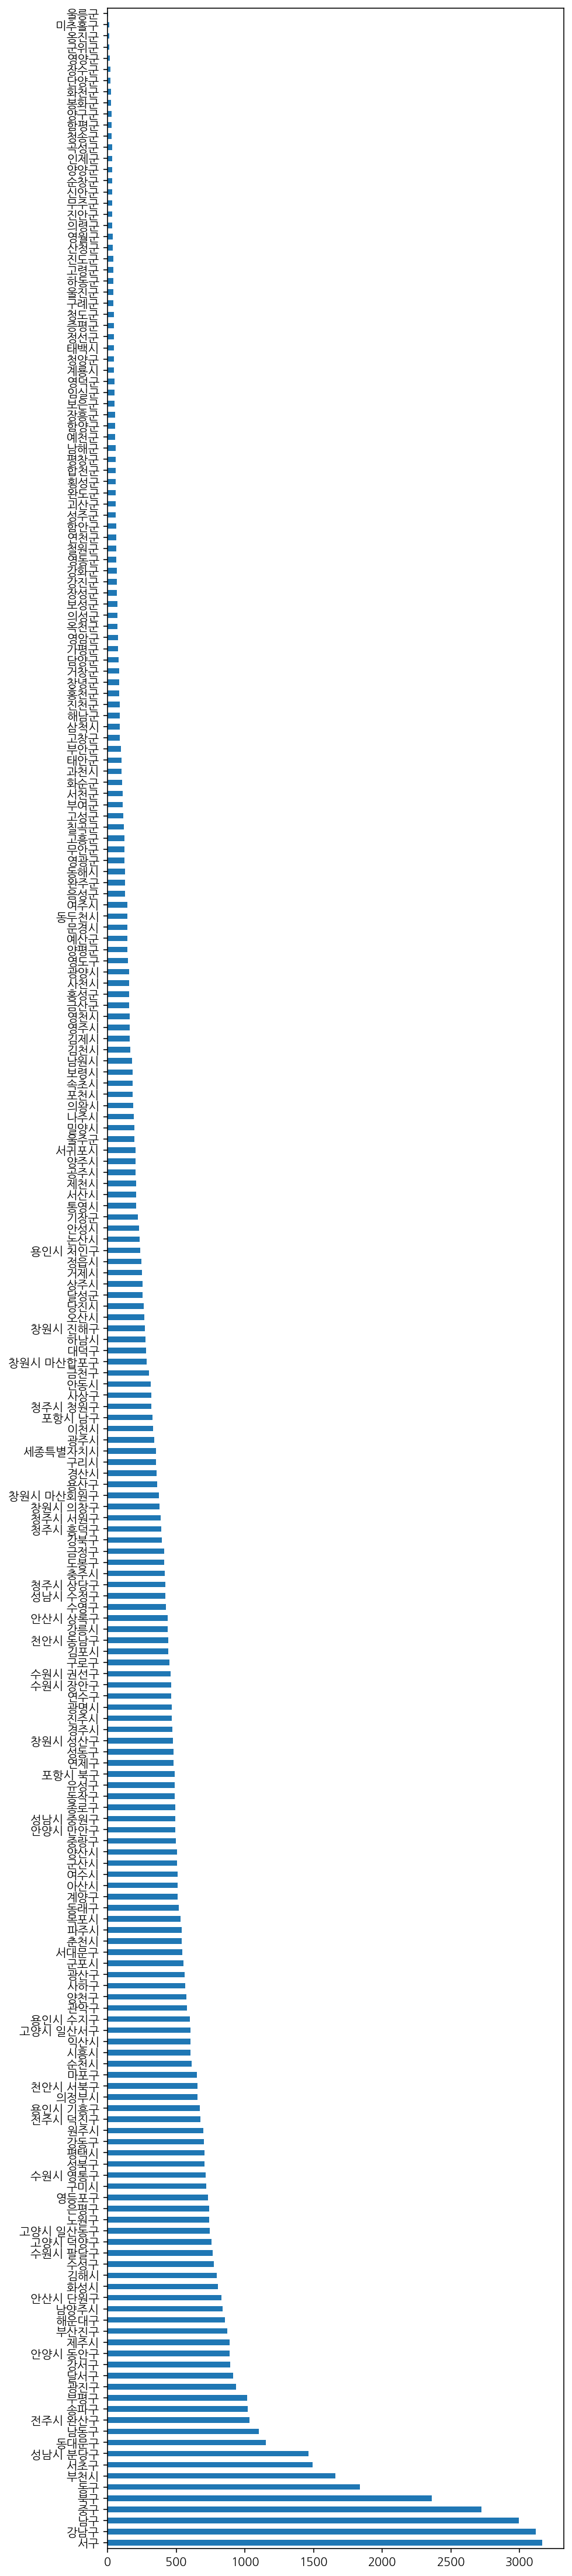

In [61]:
c.plot.barh(figsize=(7,40))

In [62]:
n = df["시군구명"].value_counts(normalize=True)
n.head()

서구     0.034797
강남구    0.034302
남구     0.032917
중구     0.029949
북구     0.025936
Name: 시군구명, dtype: float64

In [63]:
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
# df_seoul_hospital["시군구명"]
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
송파구      5
강동구      5
중구       5
강북구      4
양천구      4
서대문구     4
도봉구      4
성북구      3
금천구      2
동대문구     2
종로구      2
성동구      2
관악구      2
노원구      2
구로구      2
강서구      2
중랑구      2
동작구      1
용산구      1
은평구      1
마포구      1
Name: 시군구명, dtype: int64

In [64]:
df_seoul_hospital["상호명"].str.contains("종합병원")

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [65]:
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [66]:
# 제거할 데이터 지정하기
# 꽃배달이 상호명에 포함되었는지 확인합니다.
# df_seoul_hospital["상호명"].str.contains("꽃배달")
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [67]:
# 상호명에 여러개의 데이터(꽃배달, 의료기, 장례식장, 상담소, 어린이집)이 들어간 데이터의 인덱스 번호를 리스트 형태로 변형합니다.
drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [68]:
# 상호명에 의원이 들어간 데이터의 인덱스 번호를 리스트 형태로 변형합니다.
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [69]:
# 두 데이터를 하나로 합칩니다.
drop_row = drop_row + drop_row2
len(drop_row)

33

In [70]:
# 데이터 제거하기 
# 데이터를 제거하기 전과 후의 데이터 양의 차이를 확인합니다.
# drop()에서는 drop_row에 들어있는 index 번호에 해당하는 행을 제거하여 아시 dr_seoul_hospital에 넣어서 전체 데이터를 업데이트합니다.

print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<AxesSubplot:>

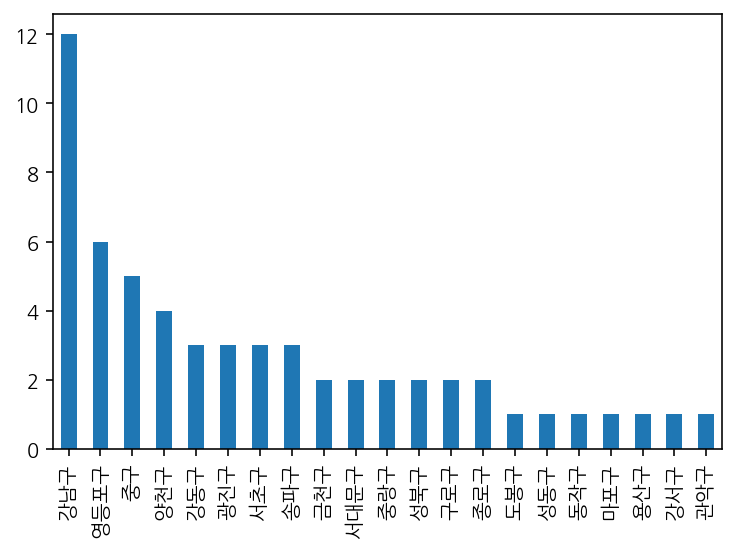

In [71]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

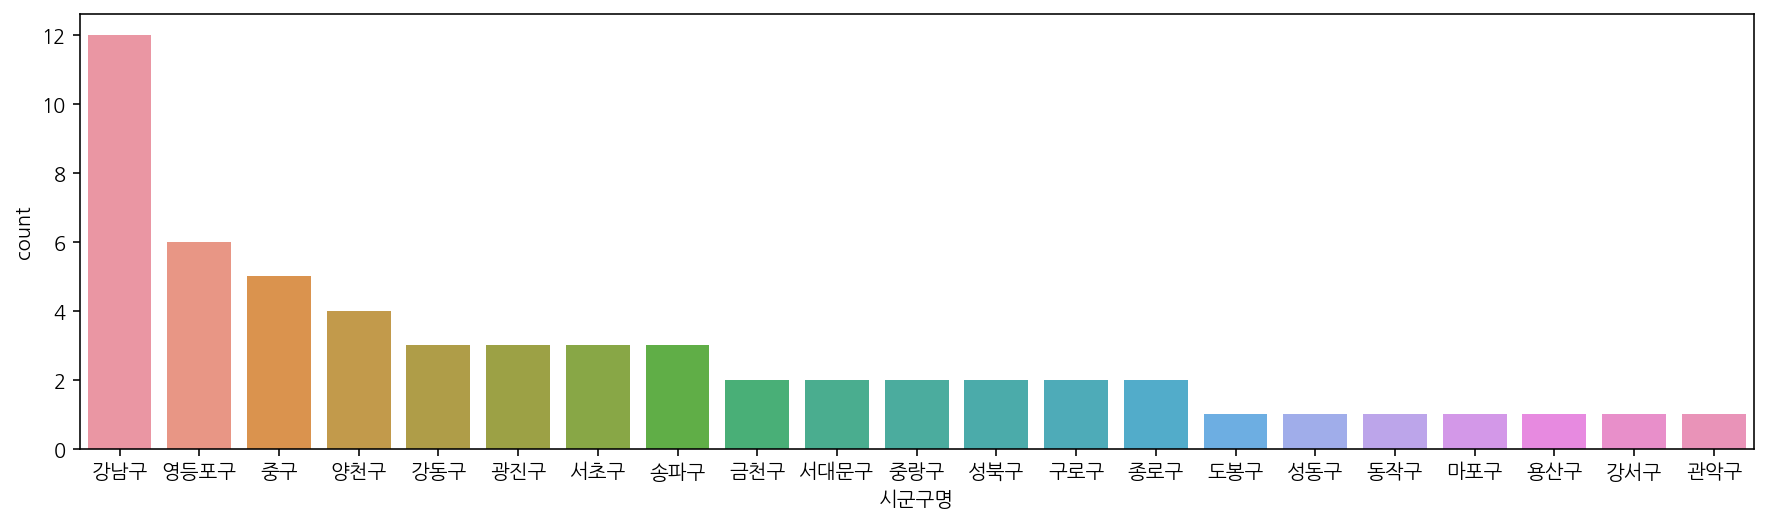

In [72]:
# seaborn으로 데이터 시각화를 해봅니다.
# 전처리를 위해서 특정 지역에 데이터가 많이 치우쳐져 있는지 확인하고, 종합병원 아닌 데이터를 제거하는 과정을 거쳤습니다.
# 전처리가 원래 데이터 분석 과정에서 시간이 많이 걸리고, 지루할 수 있습니다.

plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x="시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [73]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

In [74]:
df_seoul ["시군구명"].value_counts()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

<AxesSubplot:>

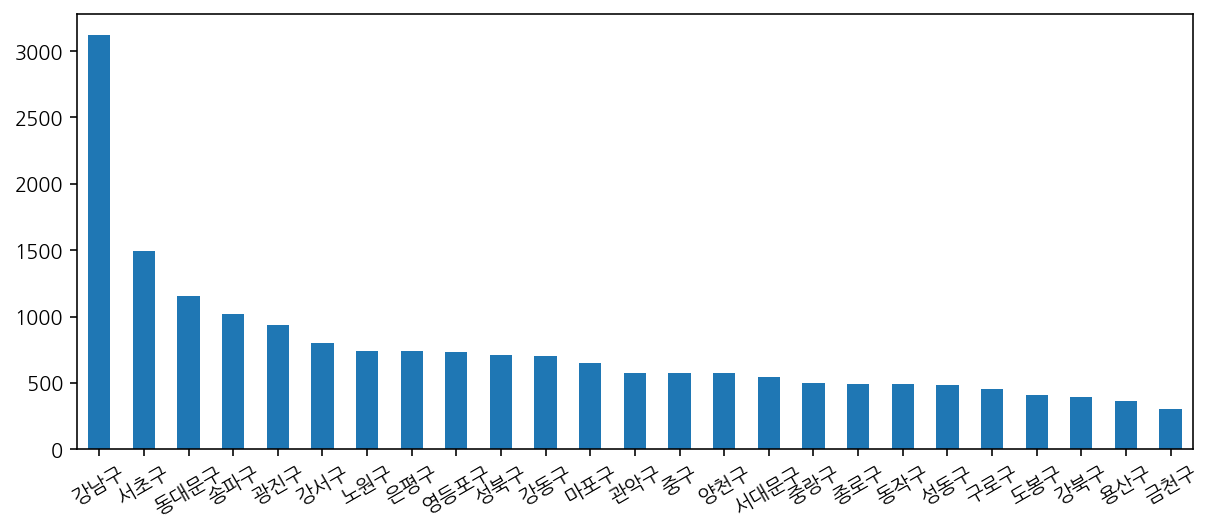

In [75]:
df_seoul ["시군구명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

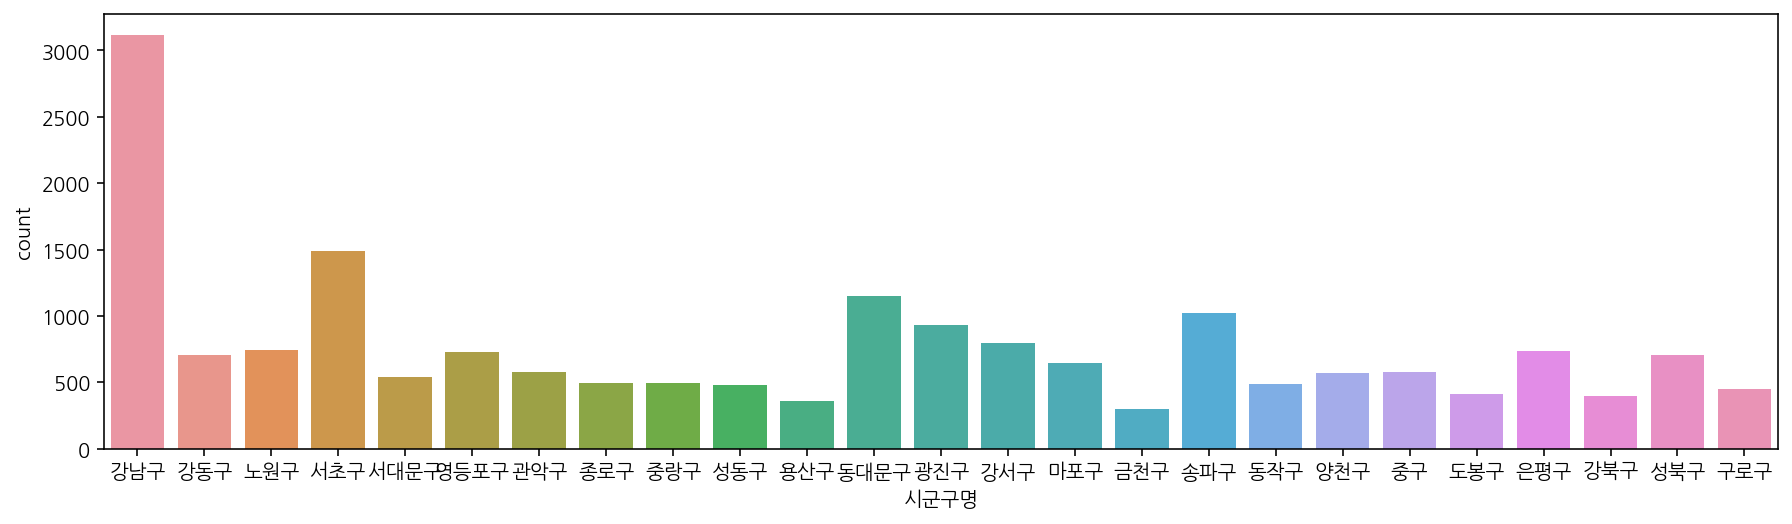

In [76]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

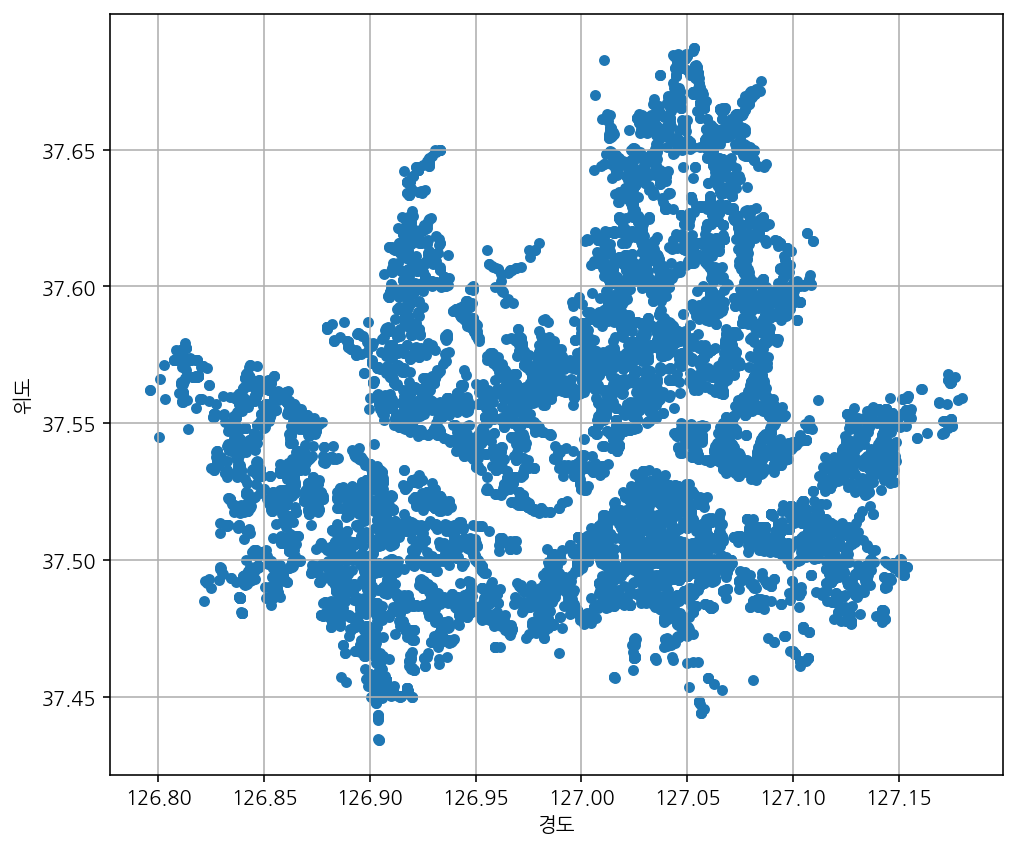

In [77]:
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

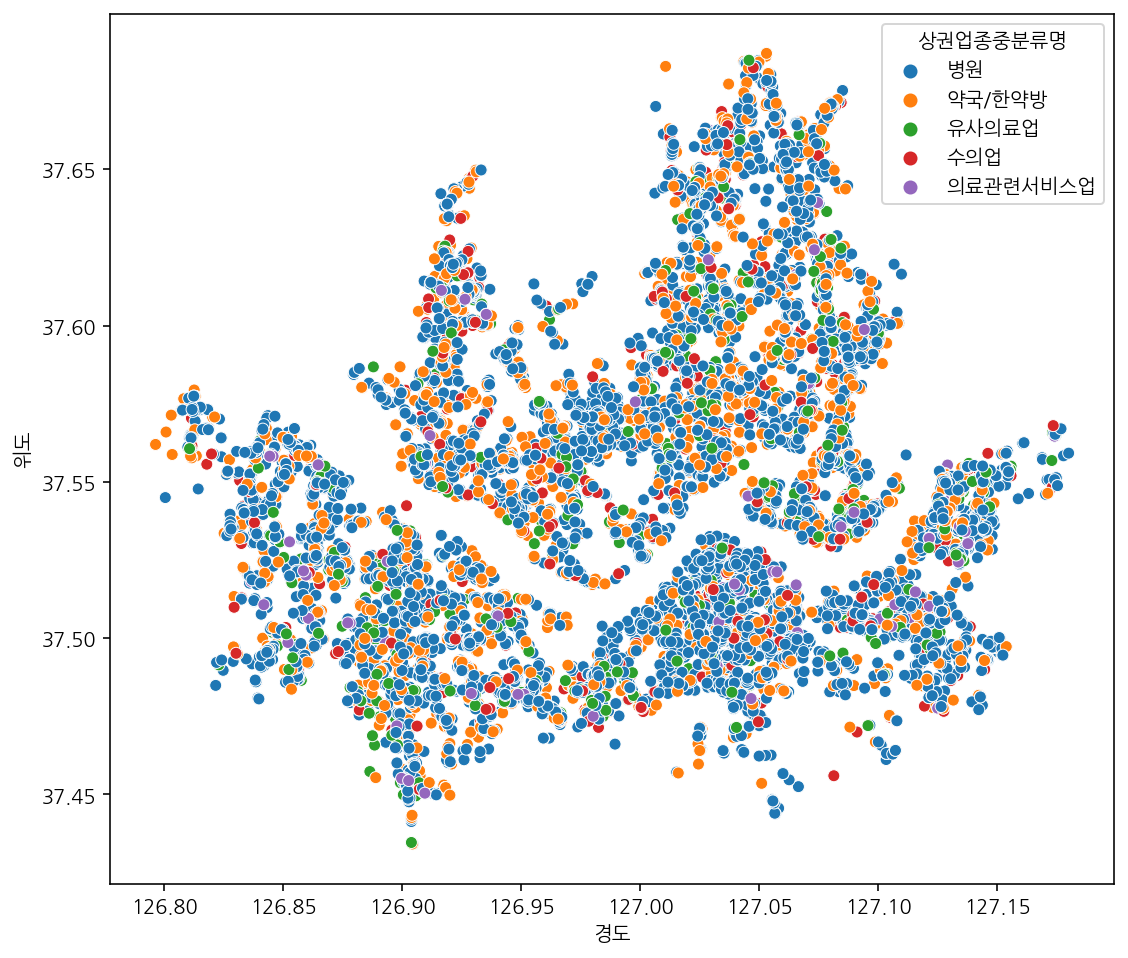

In [78]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

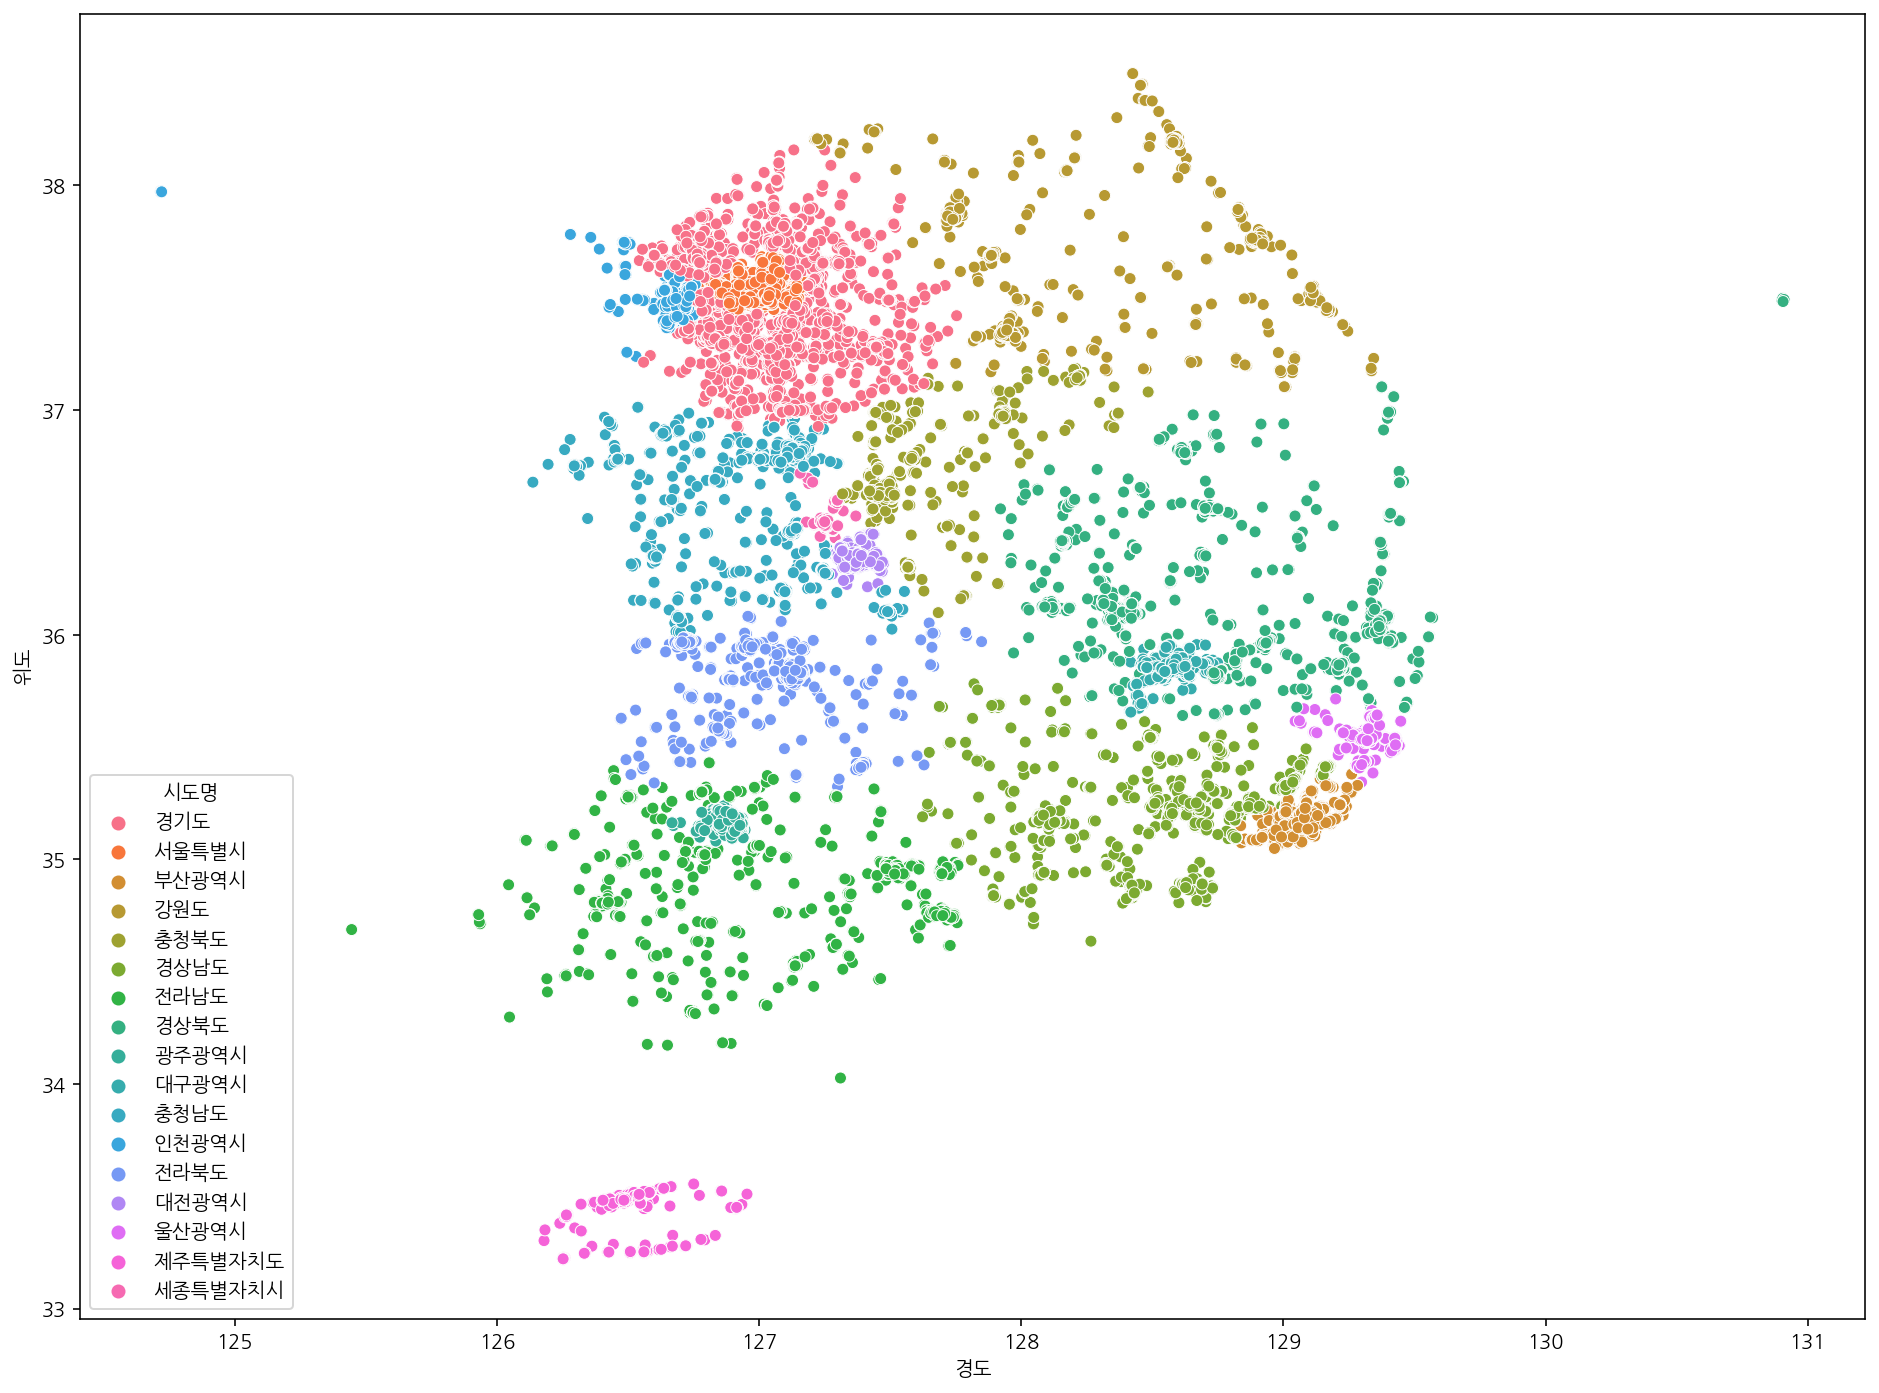

In [79]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

In [80]:
# !pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org -U folium
# !pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org -U git+https://github.com/python-visualization/branca.git@master
import folium
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.99635893566247

In [81]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(),df_seoul_hospital["경도"].mean()], zoom_start=1)


In [82]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)

map.save('index.html')
map